<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/PythonIntro/Exercicios8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se você inserir um termo de pesquisa como "clima de Itajaí" na pesquisa do Google, você verá, entre outras coisas, um gráfico mostrando a temperatura em diferentes momentos do dia. 

Sua tarefa aqui é recriar esse gráfico, usando uma cidade de sua escolha, encontre a temperatura em diferentes pontos do dia. Use os dados para criar duas listas no seu programa e criar um gráfico com a hora do dia no eixo x e a temperatura correspondente no eixo y.

O gráfico deve informar como a temperatura varia com a hora do dia. Experimente uma segunda cidade e veja como as duas cidades se comparam plotando as duas linhas no mesmo gráfico.

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

XML do serviço

http://servicos.cptec.inpe.br/XML/#req-previsao-7-dias

```
<previsao>
  <dia>2020-10-15</dia>
  <tempo>pn</tempo>
  <maxima>23</maxima>
  <minima>17</minima>
  <iuv>10.0</iuv>
</previsao>
```




In [ ]:
response = requests.get("http://servicos.cptec.inpe.br/XML/cidade/7dias/228/previsao.xml")
responseItajai = requests.get("http://servicos.cptec.inpe.br/XML/cidade/7dias/2535/previsao.xml")
root = BeautifulSoup(response.content)
rootItajai = BeautifulSoup(responseItajai.content)


In [ ]:
x = []
max = []
min = []
for previsao in root.cidade.find_all("previsao"):
  x.append(previsao.dia.text.split("-")[2])
  max.append(int(previsao.maxima.text))
  min.append(int(previsao.minima.text))

In [ ]:
maxItajai = []
minItajai = []
for previsao in rootItajai.cidade.find_all("previsao"):
  x.append(previsao.dia.text.split("-")[2])
  maxItajai.append(int(previsao.maxima.text))
  minItajai.append(int(previsao.minima.text))

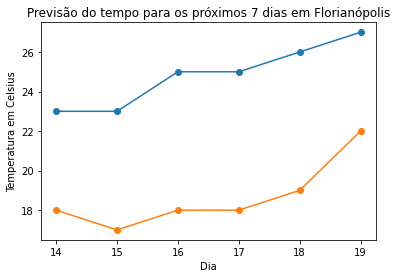

In [ ]:
plt.plot(x,max, label='Maxima', marker="o")
plt.plot(x,min, label='Minima', marker="o")
plt.title("Previsão do tempo para os próximos 7 dias em Florianópolis")
plt.xlabel("Dia")
plt.ylabel("Temperatura em Celsius")
plt.show()

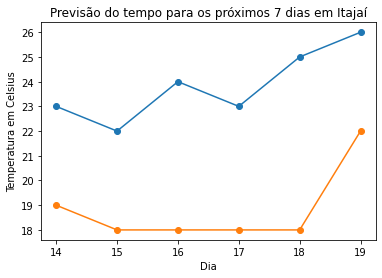

In [ ]:
plt.plot(x,maxItajai, label='Maxima', marker="o")
plt.plot(x,minItajai, label='Minima', marker="o")
plt.title("Previsão do tempo para os próximos 7 dias em Itajaí")
plt.xlabel("Dia")
plt.ylabel("Temperatura em Celsius")
plt.show()

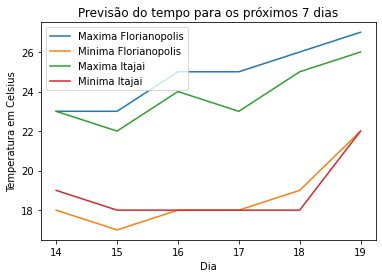

In [ ]:
plt.plot(x,max, label='Maxima Florianopolis')
plt.plot(x,min, label='Minima Florianopolis')
plt.plot(x,maxItajai, label='Maxima Itajai')
plt.plot(x,minItajai, label='Minima Itajai')
plt.title("Previsão do tempo para os próximos 7 dias")
plt.xlabel("Dia")
plt.ylabel("Temperatura em Celsius")
plt.legend()
plt.show()